# Capstone Project Two (Data Wrangling)

## 1. Importing libraries and load the data

In [1]:
# Importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import os
from scipy import stats

In [2]:
# Load the data
original_df = pd.read_csv("C:/Users/shaja/Desktop/Springboard Projects/DataScienceCapstoneProjectTwo/Dataset/BankChurners.csv")
churn_df = original_df.copy()
churn_df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
# Delete unnecessary columns
churn_df = churn_df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

In [4]:
# Rename the columns
old_names = churn_df.columns
new_names = ['Client_ID', 'Attrition_Flag', 'Age', 'Gender', 
        'Dependent_Count', 'Education', 'Marital_Status',
       'Income', 'Card_Category', 'Months_On_Book',
       'Total_Relationship_Count', 'Months_Inactive',
       'Contacts_Count', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
churn_df.rename(columns=dict(zip(old_names, new_names)), inplace=True)

In [5]:
churn_df.columns

Index(['Client_ID', 'Attrition_Flag', 'Age', 'Gender', 'Dependent_Count',
       'Education', 'Marital_Status', 'Income', 'Card_Category',
       'Months_On_Book', 'Total_Relationship_Count', 'Months_Inactive',
       'Contacts_Count', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [6]:
churn_df.shape

(10127, 21)

In [7]:
# Check the dtypes
churn_df.dtypes

Client_ID                     int64
Attrition_Flag               object
Age                           int64
Gender                       object
Dependent_Count               int64
Education                    object
Marital_Status               object
Income                       object
Card_Category                object
Months_On_Book                int64
Total_Relationship_Count      int64
Months_Inactive               int64
Contacts_Count                int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [8]:
# cross check the age column
# churn_df['Age'].min()
# churn_df['Age'].max()
churn_df['Age'].mean()

46.32596030413745

## 2. Explore the summary statistics

In [9]:
# Get the summary of the data
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client_ID                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Age                       10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_Count           10127 non-null  int64  
 5   Education                 10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income                    10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_On_Book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive           10127 non-null  int64  
 12  Contacts_Count            10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [10]:
churn_df.describe(include='all')

,Client_ID,Attrition_Flag,Age,Gender,Dependent_Count,Education,Marital_Status,Income,Card_Category,Months_On_Book,...,Months_Inactive,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127,10127.000000,10127,10127.000000,10127,10127,10127,10127,10127.000000,...,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
unique,NaN,2,NaN,2,NaN,7,4,6,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Existing Customer,NaN,F,NaN,Graduate,Married,Less than $40K,Blue,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,8500,NaN,5358,NaN,3128,4687,3561,9436,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.391776e+08,NaN,46.325960,NaN,2.346203,NaN,NaN,NaN,NaN,35.928409,...,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,NaN,8.016814,NaN,1.298908,NaN,NaN,NaN,NaN,7.986416,...,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,NaN,26.000000,NaN,0.000000,NaN,NaN,NaN,NaN,13.000000,...,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,NaN,41.000000,NaN,1.000000,NaN,NaN,NaN,NaN,31.000000,...,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,NaN,46.000000,NaN,2.000000,NaN,NaN,NaN,NaN,36.000000,...,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,NaN,52.000000,NaN,3.000000,NaN,NaN,NaN,NaN,40.000000,...,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000


In [11]:
# profile = ProfileReport(churn_df, explorative=True)
# profile

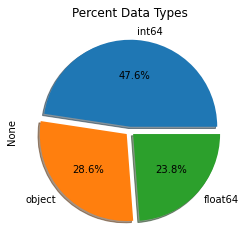

In [12]:
# data type plot
churn_df.dtypes.value_counts().plot.pie(explode=[0.05,0.05,0.05],autopct='%1.1f%%',shadow=True)
plt.title('Percent Data Types');

Explore the data to find missing values and irregularities

In [13]:
# churn_df.isna()
# churn_df.isna().any()
churn_df.isnull().sum()

Client_ID                   0
Attrition_Flag              0
Age                         0
Gender                      0
Dependent_Count             0
Education                   0
Marital_Status              0
Income                      0
Card_Category               0
Months_On_Book              0
Total_Relationship_Count    0
Months_Inactive             0
Contacts_Count              0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [14]:
# Check out the numerical columns
churn_df.select_dtypes(include=np.number)

,Client_ID,Age,Dependent_Count,Months_On_Book,Total_Relationship_Count,Months_Inactive,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [15]:
# Check out the categorical columns
churn_df.select_dtypes('object')

,Attrition_Flag,Gender,Education,Marital_Status,Income,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue
...,...,...,...,...,...,...
10122,Existing Customer,M,Graduate,Single,$40K - $60K,Blue
10123,Attrited Customer,M,Unknown,Divorced,$40K - $60K,Blue
10124,Attrited Customer,F,High School,Married,Less than $40K,Blue
10125,Attrited Customer,M,Graduate,Unknown,$40K - $60K,Blue


In [16]:
#check out the duplicated columns
churn_df[churn_df.duplicated()].sum()

Client_ID                   0.0
Attrition_Flag              0.0
Age                         0.0
Gender                      0.0
Dependent_Count             0.0
Education                   0.0
Marital_Status              0.0
Income                      0.0
Card_Category               0.0
Months_On_Book              0.0
Total_Relationship_Count    0.0
Months_Inactive             0.0
Contacts_Count              0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64

Cleaning the dataset

In [17]:
# churn_df.columns = churn_df.columns.str.strip()

In [18]:
# Number of Unique values of our categorical columns
churn_df['Attrition_Flag'].value_counts().head()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [19]:
churn_df['Gender'].value_counts().head()

F    5358
M    4769
Name: Gender, dtype: int64

In [20]:
# churn_df['Age'].unique()
# churn_df['Age'].nunique()
churn_df['Age'].value_counts().head()

44    500
49    495
46    490
45    486
47    479
Name: Age, dtype: int64

In [21]:
# churn_df['Marital_Status'].nunique()
# churn_df['Marital_Status'].unique()
churn_df['Marital_Status'].value_counts().head()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [22]:
# churn_df['Education'].unique()
# churn_df['Education'].nunique()
churn_df['Education'].value_counts().head()
churn_df['Education'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [23]:
# churn_df['Income'].nunique()
churn_df['Income'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income, dtype: int64

In [24]:
# Inspecting specific countries data
churn_df[churn_df['Attrition_Flag']=='Attrited Customer']

,Client_ID,Attrition_Flag,Age,Gender,Dependent_Count,Education,Marital_Status,Income,Card_Category,Months_On_Book,...,Months_Inactive,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
21,708508758,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,...,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
39,708300483,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,...,4,3,7882.0,605,7277.0,1.052,704,16,0.143,0.077
51,779471883,Attrited Customer,54,F,1,Graduate,Married,Less than $40K,Blue,40,...,3,1,1438.3,808,630.3,0.997,705,19,0.900,0.562
54,714374133,Attrited Customer,56,M,2,Graduate,Married,$120K +,Blue,36,...,3,3,15769.0,0,15769.0,1.041,602,15,0.364,0.000
61,712030833,Attrited Customer,48,M,2,Graduate,Married,$60K - $80K,Silver,35,...,4,4,34516.0,0,34516.0,0.763,691,15,0.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,716893683,Attrited Customer,55,F,3,Uneducated,Single,Unknown,Blue,47,...,3,3,14657.0,2517,12140.0,0.166,6009,53,0.514,0.172
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


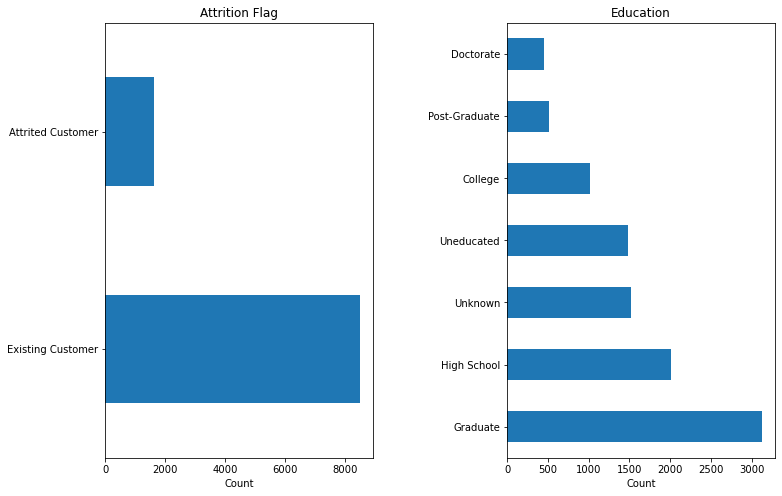

In [25]:
#Create two subplots on 1 row and 2 columns with a figsize of (12, 8)
fig, ax = plt.subplots(1, 2, figsize=(12,8))
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
churn_df.Attrition_Flag.value_counts().plot(kind='barh', ax=ax[0])
#Give the plot a helpful title of 'Region'
ax[0].set_title('Attrition Flag')
#Label the xaxis 'Count'
ax[0].set_xlabel('Count')
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
churn_df.Education.value_counts().plot(kind='barh', ax=ax[1])
#Give the plot a helpful title of 'state'
ax[1].set_title('Education')
#Label the xaxis 'Count'
ax[1].set_xlabel('Count')
#Give the subplots a little "breathing room" with a wspace of 0.5
plt.subplots_adjust(wspace=0.5);
#You're encouraged to explore a few different figure sizes, orientations, and spacing here
# as the importance of easy-to-read and informative figures is frequently understated
# and you will find the ability to tweak figures invaluable later on

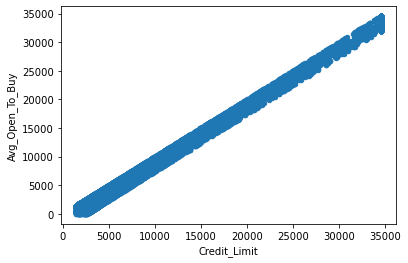

In [26]:
# Finding coorelation between Credit_Limit and Avg_Open_To_Buy columns
corr = churn_df[['Credit_Limit','Avg_Open_To_Buy']]
corr.plot(kind='scatter', x='Credit_Limit', y='Avg_Open_To_Buy')
plt.show()


In [27]:
# filter the numeric columns from the dataframe
# churn_df.select_dtypes(include=np.number)
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
churn_df.select_dtypes(include=numerics)

,Client_ID,Age,Dependent_Count,Months_On_Book,Total_Relationship_Count,Months_Inactive,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


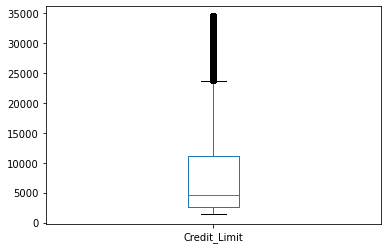

In [28]:
# Checking Outliers for Credit_Limit column
churn_df.Credit_Limit.plot(kind='box')
plt.show()

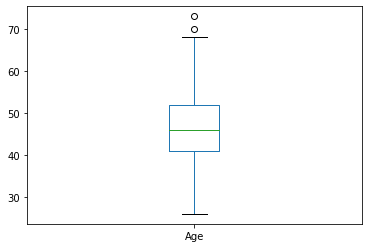

In [29]:
# Checking Outliers for Age column
churn_df.Age.plot(kind='box')
plt.show()

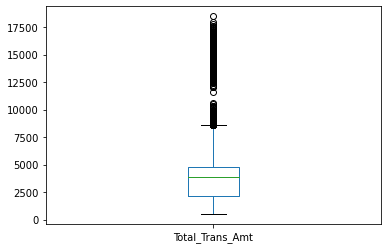

In [30]:
# Checking Outliers for Total_trans_Amt column
churn_df.Total_Trans_Amt.plot(kind='box')
plt.show()

In [31]:
# churn_df.Credit_Limit.max()
churn_df.Credit_Limit.quantile(q=0.75)

11067.5

In [32]:
"""
# z_scores = stats.zscore(df)
def drop_outliers(df, col_name):
    abs_z_scores = np.abs(stats.zscore(df[col_name]))
    filtered_entries = (abs_z_scores < 3)
    new_df = df[filtered_entries]
    return new_df
new_churn = drop_outliers(churn_df, 'Avg_Open_To_Buy')
new_churn.shape
"""

"\n# z_scores = stats.zscore(df)\ndef drop_outliers(df, col_name):\n    abs_z_scores = np.abs(stats.zscore(df[col_name]))\n    filtered_entries = (abs_z_scores < 3)\n    new_df = df[filtered_entries]\n    return new_df\nnew_churn = drop_outliers(churn_df, 'Avg_Open_To_Buy')\nnew_churn.shape\n"

In [33]:
# Drop all outliers from numerical columns
from scipy import stats

def drop_numerical_outliers(df1, z_thresh=3):
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = df1.select_dtypes(include=[np.number]) \
        .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    # Drop (inplace) values set to be rejected
    df1.drop(df1.index[~constrains], inplace=True)
    return df1
final_df = drop_numerical_outliers(churn_df)

In [34]:
final_df.shape

(9313, 21)

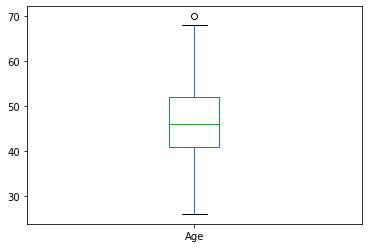

In [35]:
final_df.Age.plot(kind='box')
plt.show()

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Contacts_Count'>

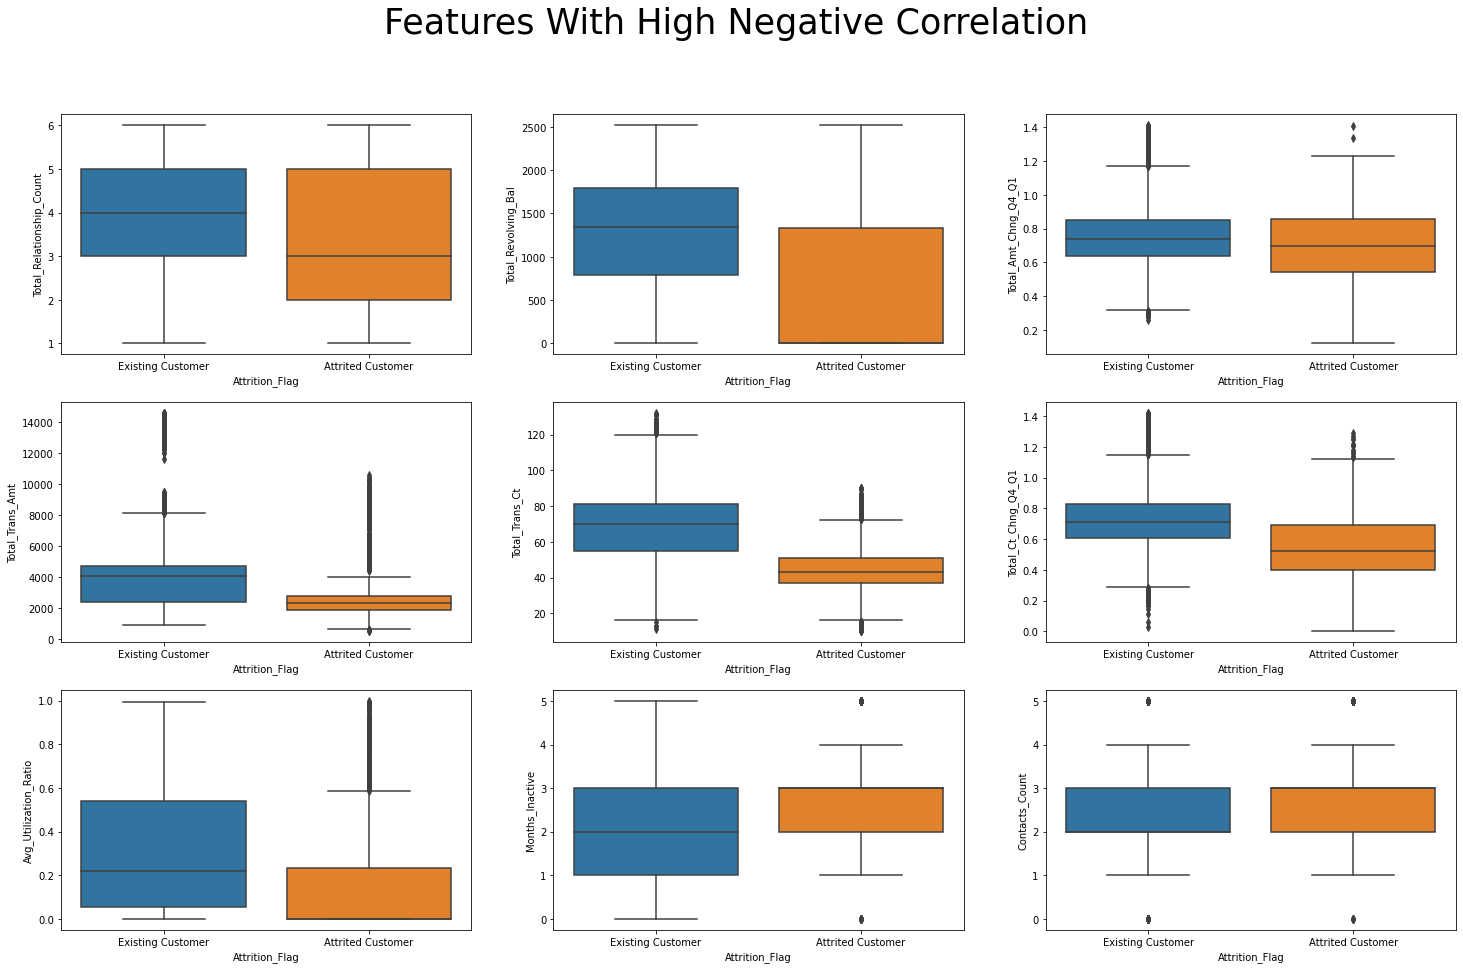

In [36]:
#visualizing the features whigh positive and negative correlation
figure, axes = plt.subplots(nrows=3, ncols=3, figsize=(25,15))
figure.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Attrition_Flag", y="Total_Relationship_Count", data=final_df, ax=axes[0,0])
sns.boxplot(x="Attrition_Flag", y="Total_Revolving_Bal", data=final_df, ax=axes[0,1])
sns.boxplot(x="Attrition_Flag", y="Total_Amt_Chng_Q4_Q1", data=final_df, ax=axes[0,2])
sns.boxplot(x="Attrition_Flag", y="Total_Trans_Amt", data=final_df, ax=axes[1,0])
sns.boxplot(x="Attrition_Flag", y="Total_Trans_Ct", data=final_df, ax=axes[1,1])
sns.boxplot(x="Attrition_Flag", y="Total_Ct_Chng_Q4_Q1", data=final_df, ax=axes[1,2])
sns.boxplot(x="Attrition_Flag", y="Avg_Utilization_Ratio", data=final_df, ax=axes[2,0])
sns.boxplot(x="Attrition_Flag", y="Months_Inactive", data=final_df, ax=axes[2,1])
sns.boxplot(x="Attrition_Flag", y="Contacts_Count", data=final_df, ax=axes[2,2])

In [37]:
# df['gender'].value_counts(normalize=True) * 100
final_df['Attrition_Flag'].value_counts(normalize=True) * 100

Existing Customer    83.496188
Attrited Customer    16.503812
Name: Attrition_Flag, dtype: float64

In [38]:
# Not Working
"""
my_df = pd.DataFrame()
for country in country_list:
    new_df= life_expectancy_data.loc[life_expectancy_data['Country']==country]
    my_df=pd.concat([my_df+new_df], ignore_index=True)
    """

"\nmy_df = pd.DataFrame()\nfor country in country_list:\n    new_df= life_expectancy_data.loc[life_expectancy_data['Country']==country]\n    my_df=pd.concat([my_df+new_df], ignore_index=True)\n    "

In [39]:
"""
life_expectancy_data['GDP'].fillna(life_expectancy_data['GDP'].median(), inplace=True)
life_expectancy_data.loc[life_expectancy_data['Country']=='Bahamas','GDP']
"""

"\nlife_expectancy_data['GDP'].fillna(life_expectancy_data['GDP'].median(), inplace=True)\nlife_expectancy_data.loc[life_expectancy_data['Country']=='Bahamas','GDP']\n"

In [40]:
# save the state_summary separately.
# df.to_csv('life_exp.csv')